In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
df = pd.read_csv('data.csv', header='infer', comment='\t',sep=",", skipinitialspace=True)
print(df.shape)

(8, 9)


In [3]:
# Get statistics about data
display(df.describe())

,Id,OS,CPU Year,Core Count,Base Clock,Memory,Python Time,C++ Time,Average Time
count,8.00000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.50000,0.75000,2019.375000,7.500000,2.995625,22.000000,87.195750,21.273000,54.234375
std,2.44949,0.46291,2.326094,2.070197,0.701861,8.280787,39.762226,10.866308,23.831878
min,1.00000,0.00000,2014.000000,4.000000,2.060000,16.000000,31.246000,5.623000,18.434500
25%,2.75000,0.75000,2019.000000,6.000000,2.526000,16.000000,70.416000,10.750000,40.583000
50%,4.50000,1.00000,2020.000000,8.000000,2.900500,16.000000,85.625000,24.780500,56.471750
75%,6.25000,1.00000,2021.000000,8.500000,3.600000,32.000000,90.462250,29.250000,60.077625
max,8.00000,1.00000,2021.000000,10.000000,4.000000,32.000000,172.707000,35.000000,101.353500


In [4]:
# Drop Id column (dimensionality reduction)
df.drop(columns=['Id', 'C++ Time', 'Python Time'], inplace=True)
display(df.describe())

,OS,CPU Year,Core Count,Base Clock,Memory,Average Time
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.75000,2019.375000,7.500000,2.995625,22.000000,54.234375
std,0.46291,2.326094,2.070197,0.701861,8.280787,23.831878
min,0.00000,2014.000000,4.000000,2.060000,16.000000,18.434500
25%,0.75000,2019.000000,6.000000,2.526000,16.000000,40.583000
50%,1.00000,2020.000000,8.000000,2.900500,16.000000,56.471750
75%,1.00000,2021.000000,8.500000,3.600000,32.000000,60.077625
max,1.00000,2021.000000,10.000000,4.000000,32.000000,101.353500


In [5]:
# Experiment: transform Sex to a numerical column
#sex_map = {'M': 1, 'F': 0, 'I': 0.5}
#df['Sex'] = df['Sex'].map(sex_map)
#print(df.shape)

In [6]:
# Experiment: make dummie columns for Sex
#df_dummies = pd.get_dummies(df, columns=['Sex'], prefix='Sex', prefix_sep='-')
#print(df_dummies.shape)

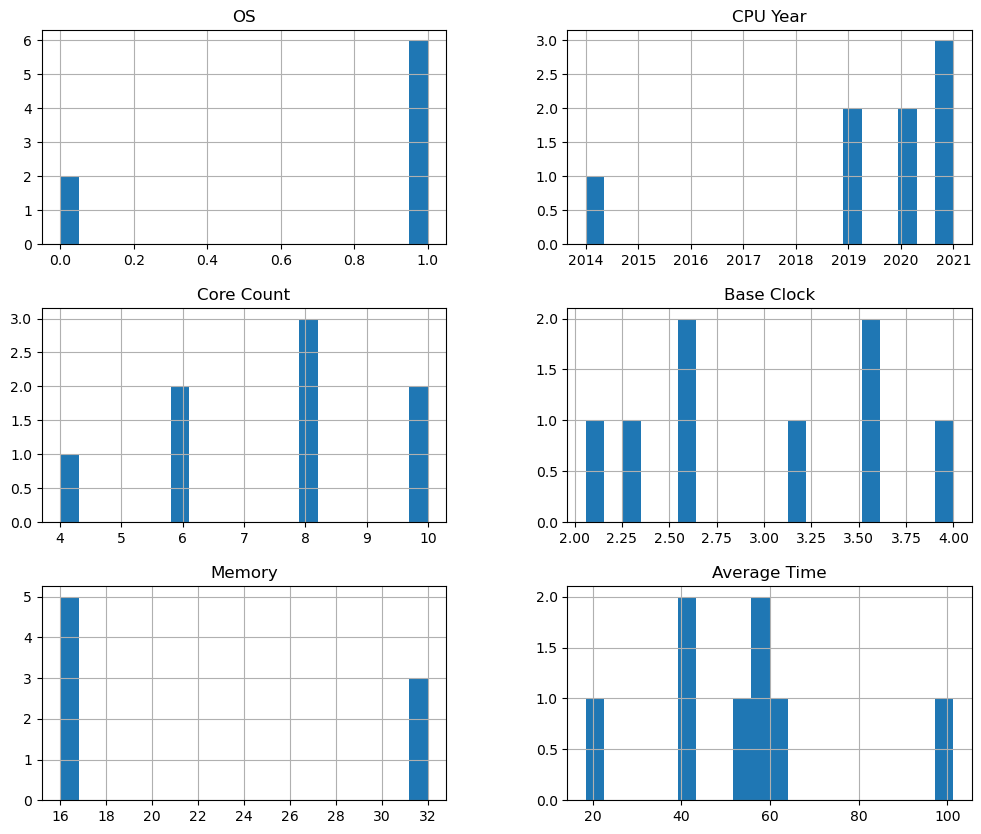

In [7]:
# EDA: histogram
df.hist(bins=20, figsize=(12, 10))
plt.show()

In [8]:
# Normalization (scaling)
scaler = StandardScaler()
normalized_columns = ['Core Count','Base Clock','CPU Year','Memory','Average Time']
df[normalized_columns] = scaler.fit_transform(df[normalized_columns])

<Axes: >

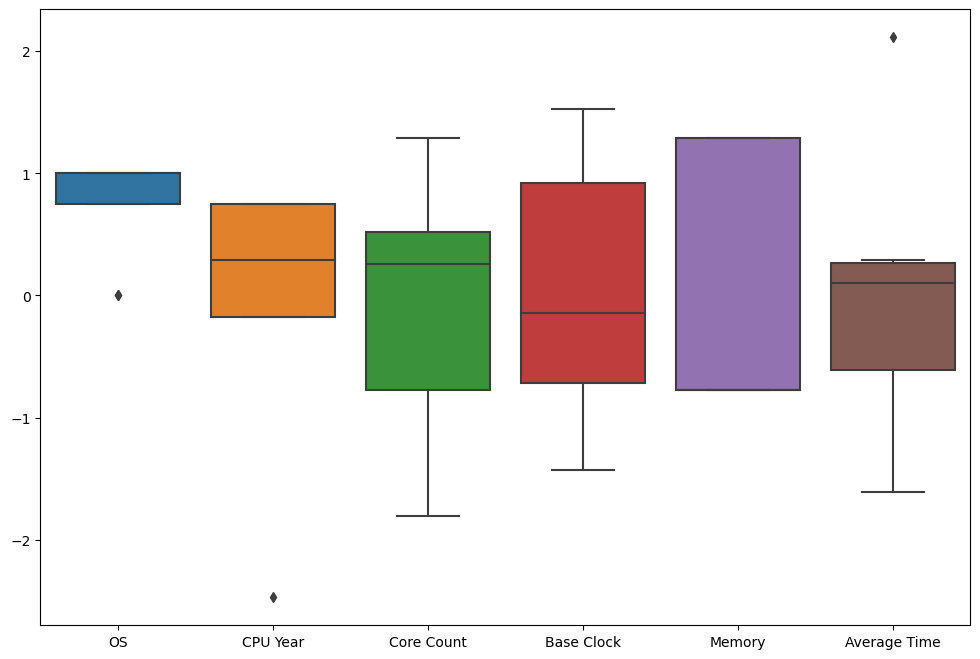

In [9]:
# EDA: boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


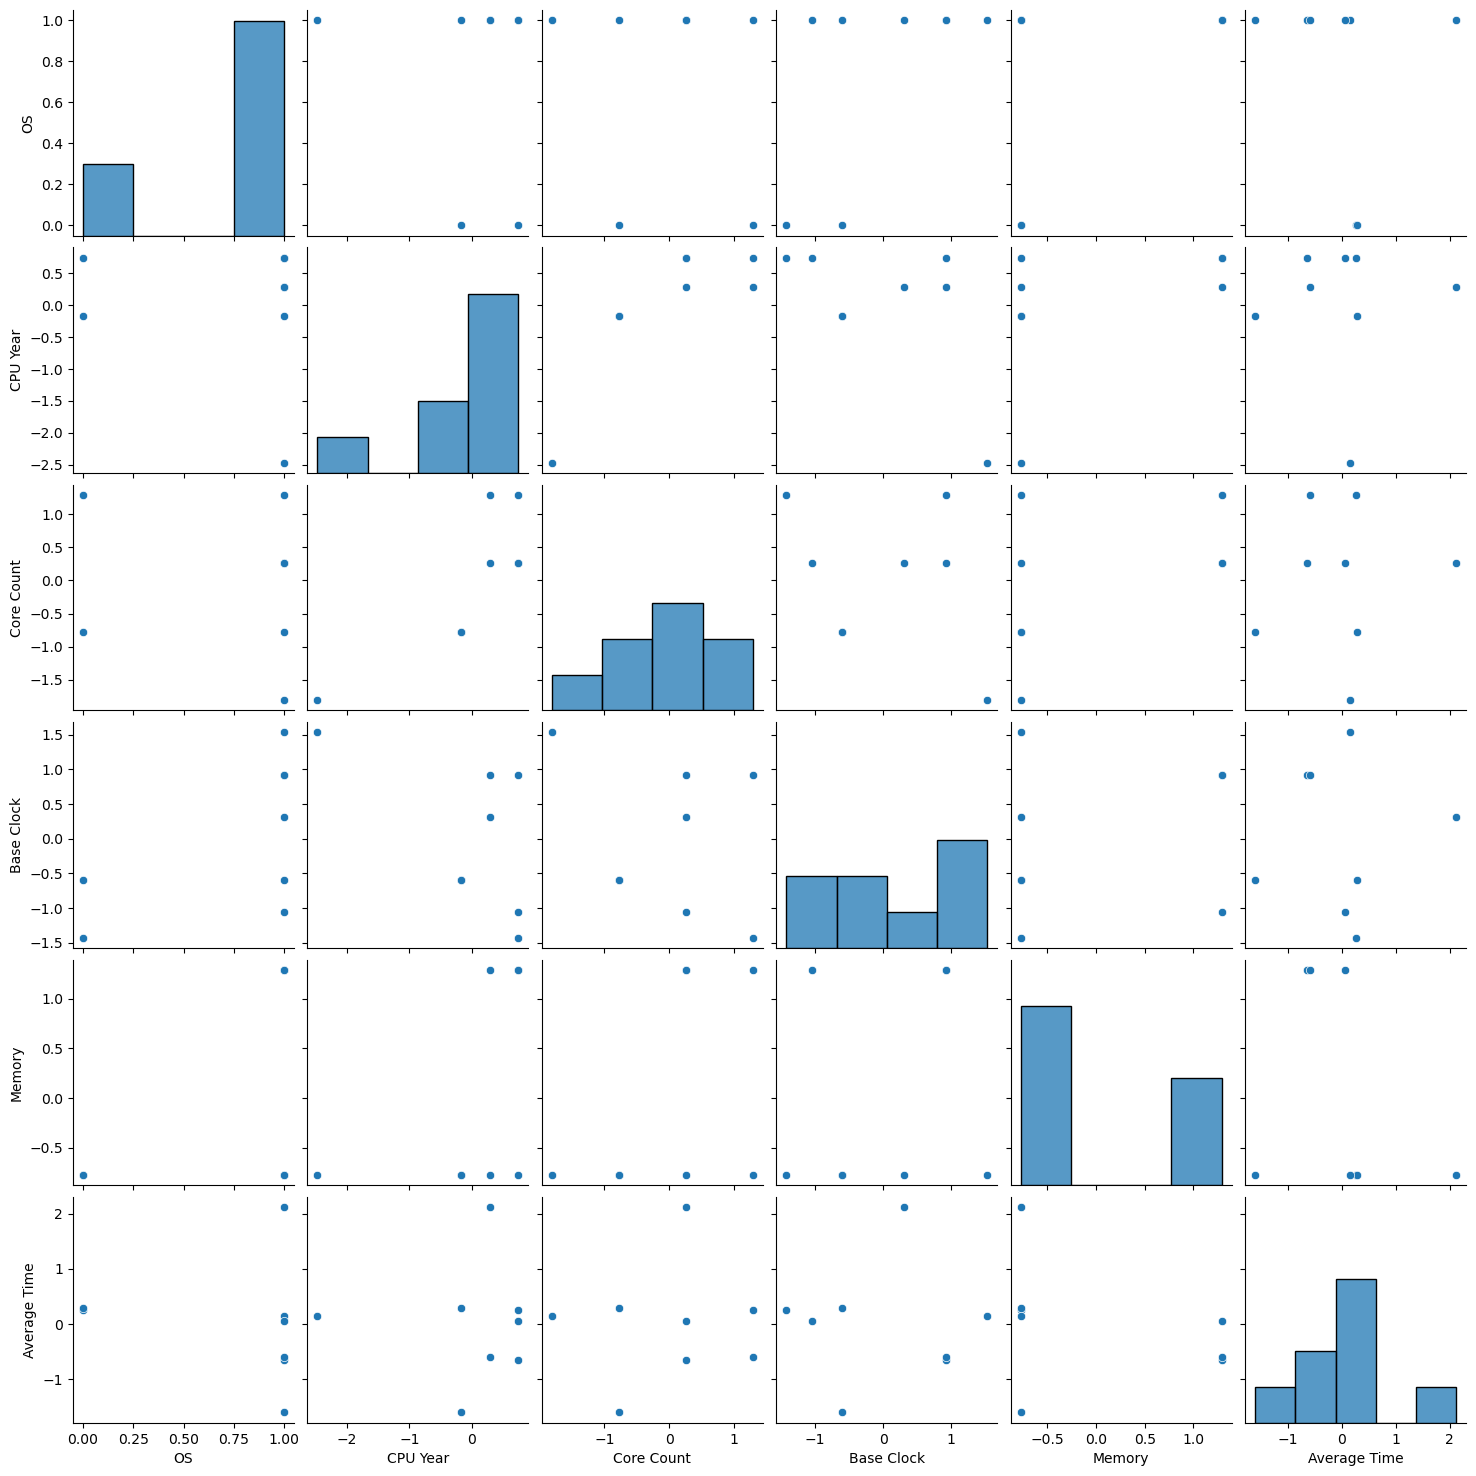

In [10]:
# EDA: pairplot
g_train = sns.pairplot(df)
(plt.show(g_train))

In [11]:
X = df.drop(columns=["Average Time"])
y = df["Average Time"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.589167744374013


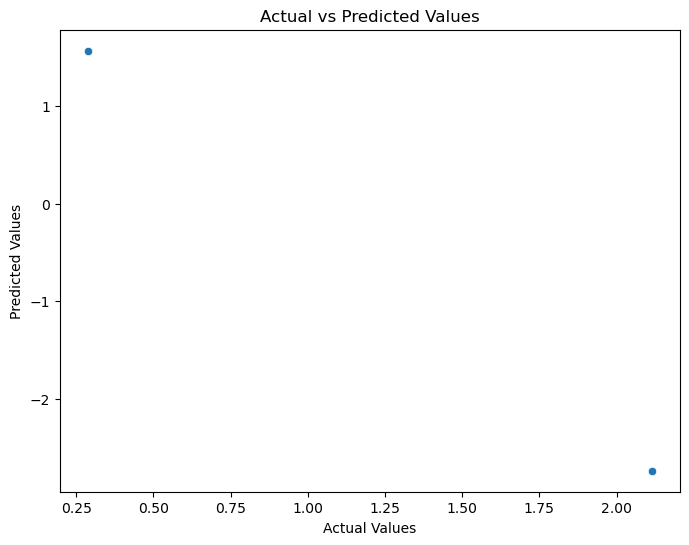

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()